<a href="https://colab.research.google.com/github/Sherlyn-Zhang/Gaussian-Process-Project/blob/main/Gaussian_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
def f(x):
  ''' define function to predict '''
  return x * np.sin(x)

#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
Y = f(X).ravel()

X = np.linspace(0, 1, n)
x = np.random.uniform(0, 1, n) # vector combining input and test input
allx = np.concatenate((x, xstar))
l = 1
sigmaf = 1
sigman = 0.1
epsilon = np.random.normal(0, sigman, n)

In [5]:
# Construct covariance matrix with SE kernel 
allX = [allx,]*n*2 # matrix including input and test 
def SEkernel(M):
  return np.exp(-1/(2*(l**2))*(M-np.transpose(M))**2)*(sigmaf**2)

allK = SEkernel(allX) #covariance matrix including input and test
K = allK[:n, :n] # covariance matrix of input
D = np.identity(n)*sigman**2 # diagonal matrix of noise variance
L = np.linalg.cholesky(K+D)
Alpha = np.linalg.solve(np.transpose(L),np.linalg.solve(L,y))
fmean = np.matmul(np.transpose(allK[:n, n:]), Alpha)
V = np.linalg.solve(L, allK[:n, n:])
Variance = allK[n:, n:] - np.matmul(np.transpose(V), V)
Log = -1/2*np.matmul(np.transpose(y), Alpha)-sum(np.log(np.diagonal(L)))-n/2*np.log(2*np.pi)

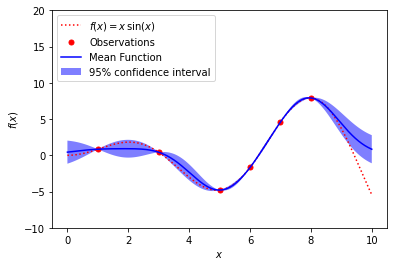

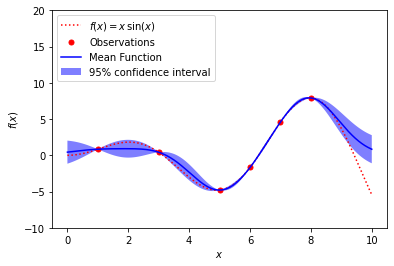

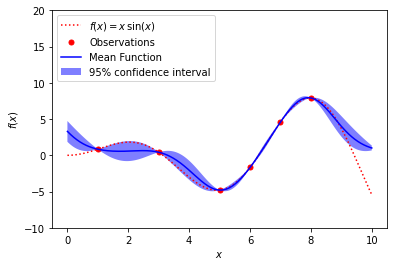

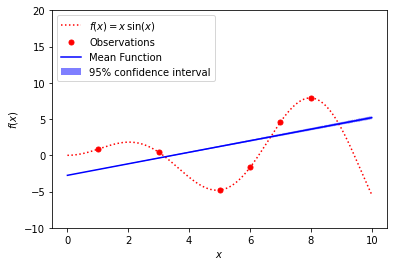

In [83]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic as RQ, ExpSineSquared as Per, DotProduct as Lin

np.random.seed(1)

def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
Kernel = [RBF(1.0, (1e-2, 1e2)), RQ(1.0, alpha =10.0), Per(1.0,1.0), Lin(1.0)]
gp = []
for k in Kernel:
  gp.append(GaussianProcessRegressor(kernel=k, n_restarts_optimizer=0))
fitted = []
for r in gp:
  fitted.append(r.fit(X,y))

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred = []
sigma = []
#gp.predict()
for r in gp:
  y_pred.append(r.predict(x, return_std=True)[0])
  sigma.append(r.predict(x, return_std=True)[1])

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
a= 0
for y_p, var in zip(y_pred, sigma):
  plt.figure()
  plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
  plt.plot(X, y, 'r.', markersize=10, label='Observations')
  plt.plot(x, y_p, 'b-', label='Mean Function')
  plt.fill(np.concatenate([x, x[::-1]]),
          np.concatenate([y_p - 1.9600 * var,
                          (y_p + 1.9600 * var)[::-1]]),
          alpha=.5, fc='b', ec='None', label='95% confidence interval')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.ylim(-10, 20)
  plt.legend(loc='upper left')
  a += 1
  plt.savefig(str(a), format = 'jpg')

plt.show()
#plt.figure()
#plt.plot(x,  f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
#plt.show()

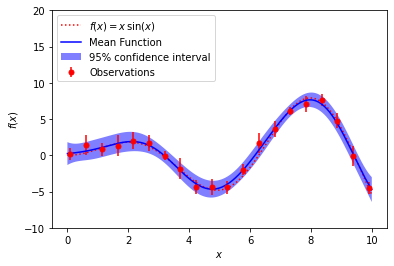

In [12]:
# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Mean Function')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()